<a href="https://colab.research.google.com/github/danlamberg/DS_AprenzidadoMaqSupervisionado/blob/main/Aprendizado_de_M%C3%A1quina_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNO: DANIEL DE OLIVEIRA LAMBERG

ALUNO: DIOGO VARONI DE MOURA

RM: 12210919

RM: 13135759

TURMA: Data Science - Osório Sala 404 - QUA - 19:00 - 21:40

Os dados foram extraídos do site do Kaggle: [Indicadores de doença do coração](https://www.kaggle.com/code/gustavolenin/indicadores-de-doen-a-do-cora-o/data)

ATRIBUTOS DO DATAFRAME

Heart Disease: Doença cardíaca

BMI: IMC

Smoking: Fuma

Alcohol Drinking: Bebe

Stroke: Derrame

Physical Health: Saúde Física

Mental Health: Saúde Mental

Diff Walking: Caminhada Diferente

Sex: Sexo

Age Category: Idade Categoria

Race: Raça

Diabetic: Diabético

Physical Activity: Atividade Física

GenHealth:

Sleep Time: Hora de Sono

Asthma: Asma

Kidney Disease: Doenca Renal

Skin Cancer: Câncer de Pele

Importando Pandas e bibliotecas:

In [193]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)


sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
df = pd.read_csv('/content/drive/MyDrive/BSI/DATA SCIENCE/Colab Notebooks/TRABALHOS 2ºB/Atividade II/heart_2020_cleaned.csv',
                    sep=';', encoding='utf-8')

Visualizando o que está no Data Frame, visualização das primeiras linhas:

In [195]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


 Transpondo o índice e as colunas:

In [196]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,319785,319786,319787,319788,319789,319790,319791,319792,319793,319794
HeartDisease,No,No,No,No,No,Yes,No,No,No,No,...,No,Yes,No,No,No,Yes,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71,28.87,21.63,31.64,26.45,40.69,...,31.93,33.2,36.54,23.38,22.22,27.41,29.84,24.24,32.81,46.56
Smoking,Yes,No,Yes,No,No,Yes,No,Yes,No,No,...,No,Yes,No,No,No,Yes,Yes,No,No,No
AlcoholDrinking,No,No,No,No,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
Stroke,No,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0,6.0,15.0,5.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
MentalHealth,30.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DiffWalking,No,No,No,No,Yes,Yes,No,Yes,No,Yes,...,No,No,No,No,No,Yes,No,No,No,No
Sex,Female,Female,Male,Female,Female,Female,Female,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44,75-79,70-74,80 or older,80 or older,65-69,...,65-69,60-64,30-34,60-64,18-24,60-64,35-39,45-49,25-29,80 or older


Obtendo um resumo conciso do dataframe:

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Retornando o número de valores ausentes para cada coluna:

In [198]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Análise dos tipos de atributos:

In [199]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Retornando linhas e colunas:

In [200]:
df.shape

(319795, 18)

## Árvores de Decisão

Transformando as variáveis categóricas nominais em variáveis categóricas ordinais:

In [201]:
df = pd.DataFrame.copy(df)

In [202]:
df['HeartDisease'].replace({'No':0, 'Yes': 1}, inplace=True)
df['Smoking'].replace({'No':0, 'Yes': 1}, inplace=True)
df['AlcoholDrinking'].replace({'No':0, 'Yes': 1}, inplace=True)
df['Stroke'].replace({'No':0, 'Yes': 1}, inplace=True)
df['Sex'].replace({'Female':0, 'Male': 1}, inplace=True)
df['PhysicalActivity'].replace({'No':0, 'Yes': 1}, inplace=True)
df['Asthma'].replace({'No':0, 'Yes': 1}, inplace=True)

In [203]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,No,0,55-59,White,Yes,1,Very good,5.0,1,No,Yes
1,0,20.34,0,0,1,0.0,0.0,No,0,80 or older,White,No,1,Very good,7.0,0,No,No
2,0,26.58,1,0,0,20.0,30.0,No,1,65-69,White,Yes,1,Fair,8.0,1,No,No
3,0,24.21,0,0,0,0.0,0.0,No,0,75-79,White,No,0,Good,6.0,0,No,Yes
4,0,23.71,0,0,0,28.0,0.0,Yes,0,40-44,White,No,1,Very good,8.0,0,No,No


Visualizando os tipos do DataFrame:


In [204]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                   int64
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease        object
SkinCancer           object
dtype: object

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [206]:
df.shape

(319795, 18)

*Verificado que uma das colunas de interesse, a coluna **"Diabetic"** será necessário transforma-la em inteiro:*

Com isso, será necessário importar o OneHotEnconder, que transforma os dados:

In [207]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [208]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['Diabetic']])

In [209]:
oneHotEncoder.todense()

matrix([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [210]:
oneHotEncoder.shape

(319795, 4)

In [211]:
nome_colunas = encoder.get_feature_names(['Diabetic'])
df_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df_encoder

,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
319790,0.0,0.0,1.0,0.0
319791,1.0,0.0,0.0,0.0
319792,1.0,0.0,0.0,0.0
319793,1.0,0.0,0.0,0.0


In [212]:
df = pd.concat([df, df_encoder], axis=1).drop(['Diabetic'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int64  
 1   BMI                               319795 non-null  float64
 2   Smoking                           319795 non-null  int64  
 3   AlcoholDrinking                   319795 non-null  int64  
 4   Stroke                            319795 non-null  int64  
 5   PhysicalHealth                    319795 non-null  float64
 6   MentalHealth                      319795 non-null  float64
 7   DiffWalking                       319795 non-null  object 
 8   Sex                               319795 non-null  int64  
 9   AgeCategory                       319795 non-null  object 
 10  Race                              319795 non-null  object 
 11  PhysicalActivity                  319795 non-null  i

Verificado que uma das colunas de interesse, a coluna "Race" será necessário transforma-la em inteiro:

In [213]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['Race']])

In [214]:
oneHotEncoder.todense()

matrix([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.]])

In [215]:
oneHotEncoder.shape

(319795, 6)

In [216]:
nome_colunas = encoder.get_feature_names(['Race'])
df_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df_encoder

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0


In [217]:
df = pd.concat([df, df_encoder], axis=1).drop(['Race'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  object 
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  object 
 10  PhysicalActivity                     319795 non-null  int64  
 11  GenHealth    

Retorna as primeiras linhas do DataFrame:

In [218]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,No,0,55-59,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,No,0,80 or older,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,No,1,65-69,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0.0,0.0,No,0,75-79,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28.0,0.0,Yes,0,40-44,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Retornando os tipos do DataFrame:

In [219]:
df.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                             object
Sex                                      int64
AgeCategory                             object
PhysicalActivity                         int64
GenHealth                               object
SleepTime                              float64
Asthma                                   int64
KidneyDisease                           object
SkinCancer                              object
Diabetic_No                            float64
Diabetic_No, borderline diabetes       float64
Diabetic_Yes                           float64
Diabetic_Yes (during pregnancy)        float64
Race_American Indian/Alaskan Native    float64
Race_Asian   

In [220]:
df.shape

(319795, 26)

Deletando colunas que contenham strings:

In [221]:
df.drop(columns={'PhysicalHealth'}, inplace=True)
df.drop(columns={'MentalHealth'}, inplace=True)
df.drop(columns={'DiffWalking'}, inplace=True)
df.drop(columns={'AgeCategory'}, inplace=True)
df.drop(columns={'GenHealth'}, inplace=True)
df.drop(columns={'KidneyDisease'}, inplace=True)
df.drop(columns={'SkinCancer'}, inplace=True)


*Atributos Previsores e Alvo*

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

In [222]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,PhysicalActivity,SleepTime,Asthma,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,0,1,5.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0,1,7.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,1,1,8.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0,0,6.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,0,1,8.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [223]:
previsores = df.iloc[:, 0:11].values

In [224]:
previsores

array([[ 0.  , 16.6 ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  , 20.34,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 26.58,  1.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , 24.24,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 32.81,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 46.56,  0.  , ...,  0.  ,  1.  ,  0.  ]])

In [225]:
previsores.shape

(319795, 11)

In [226]:
alvo = df.iloc[:, 11].values

In [227]:
alvo

array([1., 0., 1., ..., 0., 0., 0.])

In [228]:
alvo.shape

(319795,)

**ESCALONAMENTO**

Padronização (utiliza a média e o desvio padrão como referência).

In [235]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,PhysicalActivity,SleepTime,Asthma,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,0.475273,0.775362,7.097075,0.134061,0.843206,0.021204,0.127588,0.008002,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779
std,0.279766,6.356100,0.492281,0.251912,0.190567,0.499389,0.417344,1.436007,0.340718,0.363607,0.144065,0.333631,0.089095,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [236]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,Sex,PhysicalActivity,SleepTime,Asthma,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,0,1,5.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0,1,7.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,1,1,8.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0,0,6.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,0,1,8.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Importando StandardScaler, método de padronização de dados, de modo que o recurso transformado tenha média 0 e um desvio padrão de 1:

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [241]:
previsores_esc

array([[-0.30595403, -1.84475016,  1.19347355, ...,  2.54151479,
        -2.31900562, -0.14718549],
       [-0.30595403, -1.25633812, -0.83789038, ..., -0.39346613,
         0.43121931, -0.14718549],
       [-0.30595403, -0.27460254,  1.19347355, ...,  2.54151479,
        -2.31900562, -0.14718549],
       ...,
       [-0.30595403, -0.64275338, -0.83789038, ..., -0.39346613,
         0.43121931, -0.14718549],
       [-0.30595403,  0.70555975, -0.83789038, ..., -0.39346613,
         0.43121931, -0.14718549],
       [-0.30595403,  2.86883929, -0.83789038, ..., -0.39346613,
         0.43121931, -0.14718549]])

In [242]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-0.305954,-1.844750,1.193474,-0.27032,-0.198040,-0.951711,0.538256,-1.460354,2.541515,-2.319006,-0.147185
1,-0.305954,-1.256338,-0.837890,-0.27032,5.049478,-0.951711,0.538256,-0.067601,-0.393466,0.431219,-0.147185
2,-0.305954,-0.274603,1.193474,-0.27032,-0.198040,1.050739,0.538256,0.628776,2.541515,-2.319006,-0.147185
3,-0.305954,-0.647473,-0.837890,-0.27032,-0.198040,-0.951711,-1.857852,-0.763977,-0.393466,0.431219,-0.147185
4,-0.305954,-0.726138,-0.837890,-0.27032,-0.198040,-0.951711,0.538256,0.628776,-0.393466,0.431219,-0.147185
...,...,...,...,...,...,...,...,...,...,...,...
319790,3.268465,-0.144019,1.193474,-0.27032,-0.198040,1.050739,-1.857852,-0.763977,2.541515,-2.319006,-0.147185
319791,-0.305954,0.238291,1.193474,-0.27032,-0.198040,1.050739,0.538256,-1.460354,2.541515,0.431219,-0.147185
319792,-0.305954,-0.642753,-0.837890,-0.27032,-0.198040,-0.951711,0.538256,-0.763977,-0.393466,0.431219,-0.147185
319793,-0.305954,0.705560,-0.837890,-0.27032,-0.198040,-0.951711,-1.857852,3.414282,-0.393466,0.431219,-0.147185


BASE DE TREINO E TESTE

Importando train_test_split 

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [245]:
x_treino.shape

(223856, 11)

In [246]:
x_teste.shape

(95939, 11)

In [247]:
y_treino.shape

(223856,)

In [248]:
y_teste.shape

(95939,)

ÁRVORE DE DECISÃO

*Importando DecisionTreeClassifier* - classificador de árvore de decisão

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [250]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.6666666666666666, 0.875, 'X[9] <= -0.944\nentropy = 0.551\nsamples = 223856\nvalue = [195309, 28547]'),
 Text(0.5, 0.625, 'X[10] <= 3.323\nentropy = 0.692\nsamples = 35053\nvalue = [6506, 28547]'),
 Text(0.3333333333333333, 0.375, 'X[5] <= 0.05\nentropy = 0.323\nsamples = 30336\nvalue = [1789, 28547]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.505\nsamples = 15997\nvalue = [1789, 14208]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 14339\nvalue = [0, 14339]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 4717\nvalue = [4717, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 188803\nvalue = [188803, 0]')]

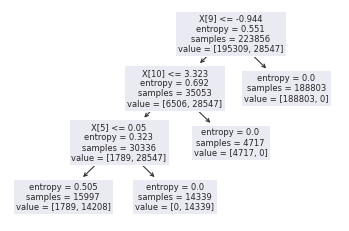

In [251]:
tree.plot_tree(_arvore)

In [252]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0., 0., 0., ..., 1., 1., 1.])

In [253]:
y_teste

array([0., 0., 0., ..., 1., 1., 1.])

In [254]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [255]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 99.20%


In [256]:
confusion_matrix(y_teste, previsoes_arvore)

array([[82914,   770],
       [    0, 12255]])

In [257]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     83684
         1.0       0.94      1.00      0.97     12255

    accuracy                           0.99     95939
   macro avg       0.97      1.00      0.98     95939
weighted avg       0.99      0.99      0.99     95939



**Análise dados de treino**

In [258]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [259]:
accuracy_score(y_treino, previsoes_treino)

0.9920082553069831

In [260]:
confusion_matrix(y_treino, previsoes_treino)

array([[193520,   1789],
       [     0,  28547]])